In [1]:
import numpy as np
from src.kmeans import KMeans
from src.gmm import GMM
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
def accuracy(c_dict, D_lables, clust_id):
    correct = 0
    for i in range(len(clust_id)):
        if c_dict[clust_id[i]] == D_labels[i]:
            correct += 1
    return correct/len(clust_id)
    

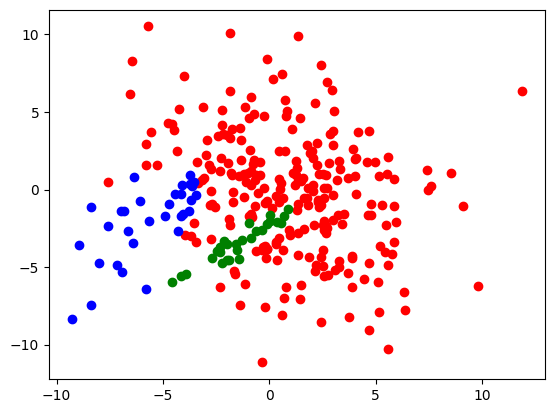

In [15]:
k = 3
mu = np.array([[-1, -1], [1, -1], [0, 1]])
cov = np.array([[[2, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 2]], [[1, 0], [0, 2]]])

km_objective = []
km_accuracy = []
gm_objective = []
gm_accuracy = []
sigma = [0.5, 1, 2, 4, 8]

for s in sigma:
    D1 = st.multivariate_normal(mu[0,:], s*cov[0, :, :]).rvs(size=100)
    D2 = st.multivariate_normal(mu[1, :], s*cov[1, :, :]).rvs(size=100)
    D3 = st.multivariate_normal(mu[2, :], s*cov[1, :, :]).rvs(size=100)
    D = np.vstack([D1, D2, D3])
    D_labels = np.hstack([np.zeros(100), np.ones(100), 2*np.ones(100)])


    KM = KMeans(D, k=k)
    KM.fit()
    
    GM = GMM(D, n_classes=k)
    GM.fit(n_iter=100, verbose=False)

    conversion_dict_km = {i: np.argmin(np.linalg.norm(mu - KM.C[i], axis=1), axis=0) for i in range(k)}
    conversion_dict_gm = {i: np.argmin(np.linalg.norm(mu - GM.mu[i], axis=1), axis=0) for i in range(k)}

    accuracy_k = accuracy(conversion_dict_km, D_labels, KM.cluster_ids)
    accuracy_gm = accuracy(conversion_dict_gm, D_labels, GM.cluster_ids)
    km_accuracy.append(accuracy_k)
    gm_accuracy.append(accuracy_gm)
    
    km_objective.append(KM.evaluate())
    gm_objective.append(GM.evaluate())
    

mask = (GM.cluster_ids == 1)
plt.scatter(D[mask, 0], D[mask, 1], color='r')
mask = (GM.cluster_ids == 2)
plt.scatter(D[mask, 0], D[mask, 1], color='b')
mask = (GM.cluster_ids == 0)
plt.scatter(D[mask, 0], D[mask, 1], color='g')

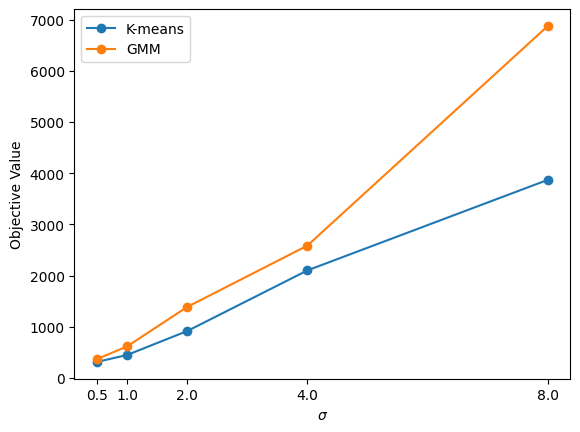

In [16]:
plt.plot(sigma, km_objective, label='K-means', marker='o')
plt.plot(sigma, gm_objective, label='GMM', marker='o')
plt.xticks(sigma)
plt.ylabel('Objective Value')
plt.xlabel(r'$\sigma$')
plt.legend()

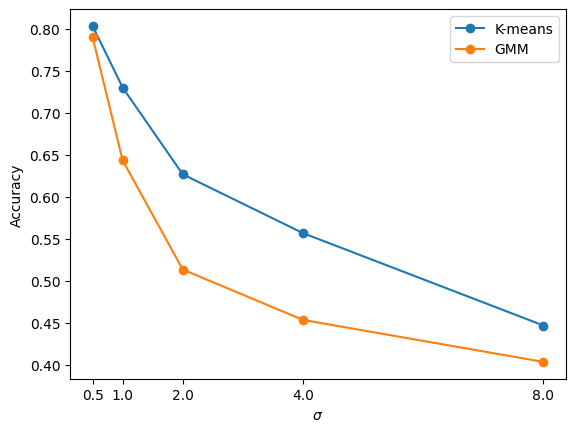

In [17]:
plt.plot(sigma, km_accuracy, label='K-means', marker='o')
plt.plot(sigma, gm_accuracy, label='GMM', marker='o')
plt.xticks(sigma)
plt.ylabel('Accuracy')
plt.xlabel(r'$\sigma$')
plt.legend()